## Data cleaning / Data manipulation / Model selection / HyperParameters selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [78]:
# Loading data
data = pd.read_csv('data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Visualization

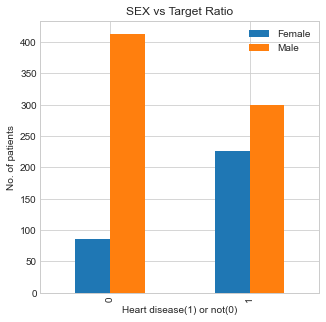

In [59]:
pd.crosstab(data.target,data.sex).plot(kind='bar',figsize=(5,5));
plt.title('SEX vs Target Ratio');
plt.ylabel('No. of patients');
plt.xlabel('Heart disease(1) or not(0)');
plt.legend(['Female','Male']);

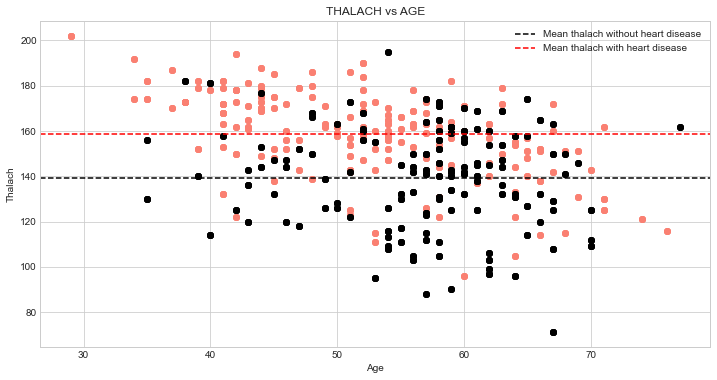

In [64]:
plt.style.use('seaborn-whitegrid')
fig,ax0 = plt.subplots(figsize=(12,6));
ax0.scatter(data.age[data.target==1],data.thalach[data.target==1],color='salmon');
ax0.scatter(data.age[data.target==0],data.thalach[data.target==0],color='black');
ax0.axhline(data.thalach[data.target==0].mean(),linestyle='--',color='black',label='Mean thalach without heart disease');
ax0.axhline(data.thalach[data.target==1].mean(),linestyle='--',color='red',label='Mean thalach with heart disease');
ax0.set(title='THALACH vs AGE',xlabel='Age',ylabel='Thalach');
ax0.legend();

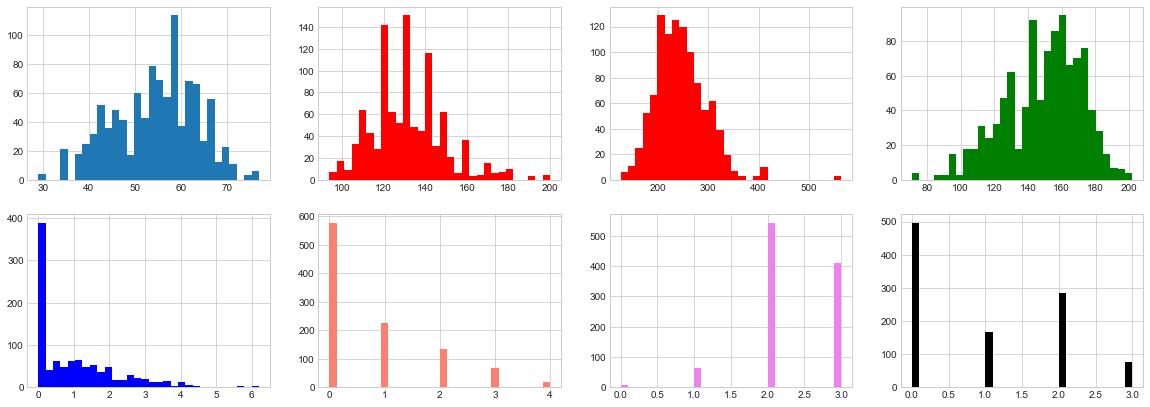

In [114]:
# Distribution of all features
fig , sub = plt.subplots(nrows=2,ncols=4,figsize=(20,7))
sub[0,0].hist(data.age,bins=30);
sub[0,1].hist(data.trestbps,bins=30,color='red');
sub[0,2].hist(data.chol,bins=30,color='red');
sub[0,3].hist(data.thalach,bins=30,color='green');

sub[1,0].hist(data.oldpeak,bins=30,color='blue');
sub[1,1].hist(data.ca,bins=30,color='salmon');
sub[1,2].hist(data.thal,bins=30,color='violet');
sub[1,3].hist(data.cp,bins=30,color='black');

In [126]:
pd.crosstab(data.target,data.cp)

cp,0,1,2,3
target,,,,
0,375,33,65,26
1,122,134,219,51


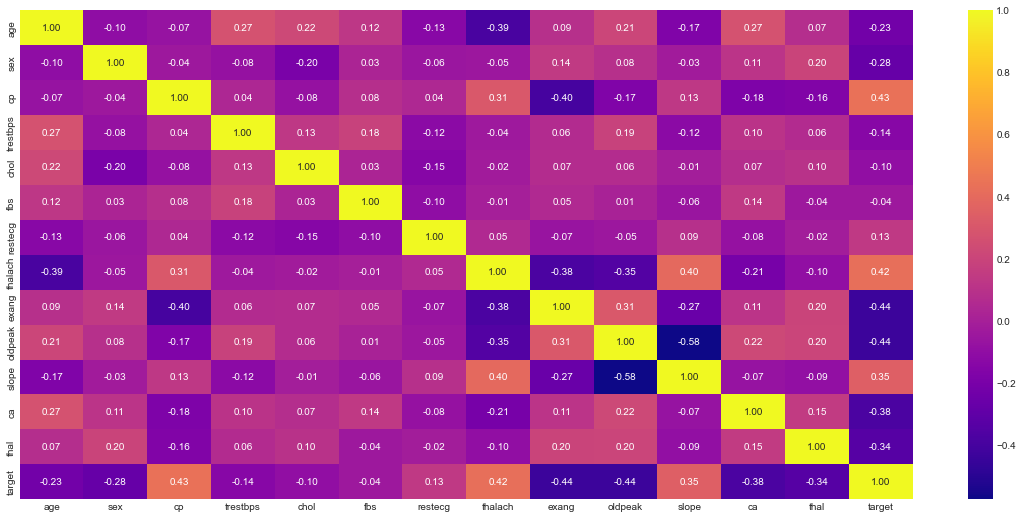

In [139]:
# corelation between every feature and target 
corr_mat = data.corr()
fig, ax = plt.subplots(figsize=(20,9))
ax = sns.heatmap(corr_mat,cmap='plasma',fmt='.2f',annot=True)

### Take 
* cp and thalach has direct positive correlation with target
* ddpeak and exang has directive negative correlation with target
* chol and fbs has minimum correlation with target

In [140]:
from sklearn.model_selection import train_test_split
X = data.drop('target',axis=1)
Y = data.target

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
697,67,1,2,152,212,0,0,150,0,0.8,1,0,3
586,64,1,2,125,309,0,1,131,1,1.8,1,0,3
67,42,1,0,136,315,0,1,125,1,1.8,1,0,1
891,64,0,0,180,325,0,1,154,1,0.0,2,0,2
470,60,0,3,150,240,0,1,171,0,0.9,2,0,2


### Choosing the right model 

In [151]:
models = {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier()}
def eval_model(y_true,y_preds):
    acc = accuracy_score(y_true,y_preds)
    rec = recall_score(y_true,y_preds)
    pre = precision_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    scores = {'accuracy':acc,
              'precision':pre,
              'recall':rec,
              'f1':f1}
    return scores
    
def best_baseline_model(models):
    for name,model in models.items():
        model.fit(x_train,y_train)
        y_preds = model.predict(x_test)
        score = eval_model(y_test,y_preds)
        print(name)
        for name,score in score.items():
            print(name,score)
        print("")
            
best_baseline_model(models)

RandomForestClassifier
accuracy 1.0
precision 1.0
recall 1.0
f1 1.0

LogisticRegression
accuracy 0.8585365853658536
precision 0.8425925925925926
recall 0.883495145631068
f1 0.8625592417061612

KNeighborsClassifier
accuracy 0.7268292682926829
precision 0.7117117117117117
recall 0.7669902912621359
f1 0.7383177570093458



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
